In [2]:
from tardis_em.utils.load_data import load_image

path = '../../../../Downloads/GridA1_section1_crop_semantic.mrc'
img, px = load_image(path)

path = '../../../../Downloads/GridA1_section1_crop_semantic_auto.mrc'
img_auto, px = load_image(path)

In [3]:
from tardis_em.dist_pytorch.utils.build_point_cloud import BuildPointCloud

post_processes = BuildPointCloud()

pc_hd, pc_ld = post_processes.build_point_cloud(
                    image=img, down_sampling=5
                )

pc_hd_auto, pc_ld_auto = post_processes.build_point_cloud(
                    image=img_auto, down_sampling=5
                )



In [8]:
import numpy as np
pc_ld = np.hstack((np.zeros(len(pc_ld))[:, np.newaxis], pc_ld))
pc_ld_auto = np.hstack((np.zeros(len(pc_ld_auto))[:, np.newaxis], pc_ld_auto))


In [9]:
import pandas as pd

segments = pd.DataFrame(pc_ld)
segments.to_csv(
    '../../../../Downloads/GridA1_section1_crop_semantic.csv',
    header=["IDs", "X [A]", "Y [A]", "Z [A]"],
    index=False,
    sep=",",
)

segments = pd.DataFrame(pc_ld_auto)
segments.to_csv(
    '../../../../Downloads/GridA1_section1_crop_semantic_auto.csv',
    header=["IDs", "X [A]", "Y [A]", "Z [A]"],
    index=False,
    sep=",",
)

In [2]:
path = (
    "/Users/robertkiewisz/Desktop/test/231110_JanelTTLL11_212-800_100nM_010_no_salt.nd2"
)

extensions_points = (".csv",)

extensions_images = (".rec", ".mrc", ".tiff", ".tif", ".nd2", ".am")
path.endswith(extensions_images)

True

In [25]:
import os
import numpy as np

path = "../../../tesing_data/TS_Dogic_800.mrc_16.56Apx_SpatialGraph_filter.am"
with open(path, "r") as f:
    df = next(f).split(" ")

if {"AS", "ASI"}.intersection(df):
    print(True)

In [ ]:
f.readline(-1)

In [3]:
import torch


def get_available_devices():
    devices = ["cpu"]

    # Check if CUDA (NVIDIA GPU) is available and list all available CUDA devices
    if torch.cuda.is_available():
        for i in range(torch.cuda.device_count()):
            devices.append(f"cuda:{i}")

    # Check for MPS (Apple's Metal Performance Shaders) availability
    if torch.backends.mps.is_available():
        devices.append("mps")

    return devices

In [4]:
get_available_devices()

['cpu', 'mps']

In [5]:
import numpy as np

data = np.genfromtxt(
    "../../../test/Predictions/231110_JanelTTLL11_212-800_100nM_010_no_salt_3_instances_filter.csv",
    skip_header=1,
    delimiter=",",
    dtype=np.float16,
)
unique_ids = np.unique(data[:, 0])

In [6]:
from os.path import splitext, basename

path = "../../../test/Predictions/231110_JanelTTLL11_212-800_100nM_010_no_salt_3_instances_filter.csv"
splitext(basename(path))[0]

'231110_JanelTTLL11_212-800_100nM_010_no_salt_3_instances_filter'

In [7]:
data = data[:, 1:]
data = np.vstack((data[:, 2], data[:, 1], data[:, 0])).T
data

array([[   0. , 1089. ,  922. ],
       [   0. , 1089. ,  917. ],
       [   0. , 1089. ,  912. ],
       ...,
       [   0. ,  721.5,  487. ],
       [   0. ,  721.5,  482. ],
       [   0. ,  721. ,  479. ]], dtype=float16)

In [1]:
from tardis_em.utils.load_data import load_nd2_file
import os

dirs_ = "../../../../Downloads/MTs_TIRF/"
paths = [i for i in os.listdir(dirs_) if i.endswith(".nd2")]

# nd2, _ = load_nd2_file(os.path.join(dirs_, paths[0]), )

nd2_ = []
for i in paths:
    nd2, _ = load_nd2_file(
        os.path.join(dirs_, i),
    )
    nd2_.append(nd2)

(2, 10, 1, 1010, 1268)
(2, 6, 1, 920, 1468)
(3, 6, 1, 954, 1356)
(2, 10, 1, 1048, 1476)
(2, 6, 1, 936, 1504)
(3, 6, 1, 954, 1356)
(2, 6, 1, 920, 1468)
(2, 6, 31, 924, 1506)
(3, 6, 1, 954, 1356)
(3, 6, 1, 954, 1356)
(3, 6, 1, 954, 1356)
(2, 10, 1, 1010, 1268)
(3, 6, 1, 954, 1356)
(2, 8, 1, 1108, 1346)
(2, 6, 1, 920, 1468)
(2, 6, 1, 920, 1468)
(2, 6, 1, 840, 1548)
(3, 6, 1, 954, 1356)
(2, 6, 1, 840, 1548)
(3, 6, 1, 954, 1356)
(2, 10, 1, 1010, 1268)
(2, 10, 1, 1010, 1268)
(2, 10, 1, 1048, 1476)
(2, 8, 1, 1108, 1346)
(2, 10, 1, 1010, 1268)
(2, 6, 1, 840, 1548)
(2, 6, 31, 936, 1504)
(2, 6, 31, 924, 1506)
(2, 6, 1, 920, 1468)
(2, 10, 1, 1010, 1268)
(2, 6, 1, 920, 1468)
(3, 6, 1, 954, 1356)
(2, 6, 31, 920, 1468)
(2, 10, 1, 1010, 1268)
(2, 10, 1, 1048, 1476)
(3, 6, 1, 954, 1356)


In [2]:
paths[7]

'2024-10-14_TTLL11_212-800_100nM_005.nd2'

In [2]:
for i in nd2_:
    print(i.shape)

(2, 10, 1, 1010, 1268)
(2, 6, 1, 920, 1468)
(3, 6, 1, 954, 1356)
(2, 10, 1, 1048, 1476)
(2, 6, 1, 936, 1504)
(3, 6, 1, 954, 1356)
(2, 6, 1, 920, 1468)
(2, 6, 31, 924, 1506)
(3, 6, 1, 954, 1356)
(3, 6, 1, 954, 1356)
(3, 6, 1, 954, 1356)
(2, 10, 1, 1010, 1268)
(3, 6, 1, 954, 1356)
(2, 8, 1, 1108, 1346)
(2, 6, 1, 920, 1468)
(2, 6, 1, 920, 1468)
(2, 6, 1, 840, 1548)
(3, 6, 1, 954, 1356)
(2, 6, 1, 840, 1548)
(3, 6, 1, 954, 1356)
(2, 10, 1, 1010, 1268)
(2, 10, 1, 1010, 1268)
(2, 10, 1, 1048, 1476)
(2, 8, 1, 1108, 1346)
(2, 10, 1, 1010, 1268)
(2, 6, 1, 840, 1548)
(2, 6, 31, 936, 1504)
(2, 6, 31, 924, 1506)
(2, 6, 1, 920, 1468)
(2, 10, 1, 1010, 1268)
(2, 6, 1, 920, 1468)
(3, 6, 1, 954, 1356)
(2, 6, 31, 920, 1468)
(2, 10, 1, 1010, 1268)
(2, 10, 1, 1048, 1476)
(3, 6, 1, 954, 1356)


(2, 6, 31, 924, 1506)


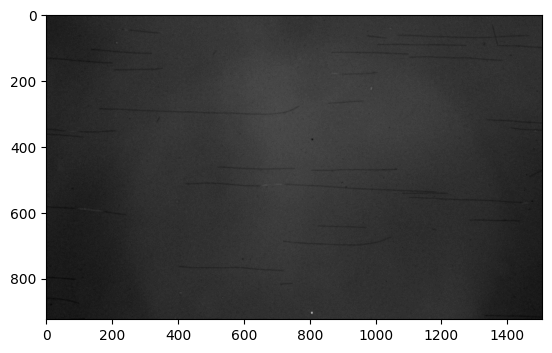

In [15]:
import matplotlib.pyplot as plt

i = 7
print(nd2_[i].shape)
plt.imshow(nd2_[i][0, 0, 0, ...], cmap="gray")

In [10]:
import numpy as np

np.mean(nd2_[i][0, 0, 0, ...]) / np.std(nd2_[i][0, 0, 0, ...])

np.float64(5.938466068091751)

In [ ]:
from tardis_em.utils.visualize_pc import show_image_list

show_image_list([i for i in nd2])

7.354


(array([3.84930000e+04, 3.12539000e+05, 6.54397800e+06, 8.70755810e+07,
        6.68297401e+08, 8.00629773e+08, 2.02947551e+08, 1.62121990e+07,
        1.28981500e+06, 5.23500000e+04]),
 array([-128. , -102.5,  -77. ,  -51.5,  -26. ,   -0.5,   25. ,   50.5,
          76. ,  101.5,  127. ]),
 <BarContainer object of 10 artists>)

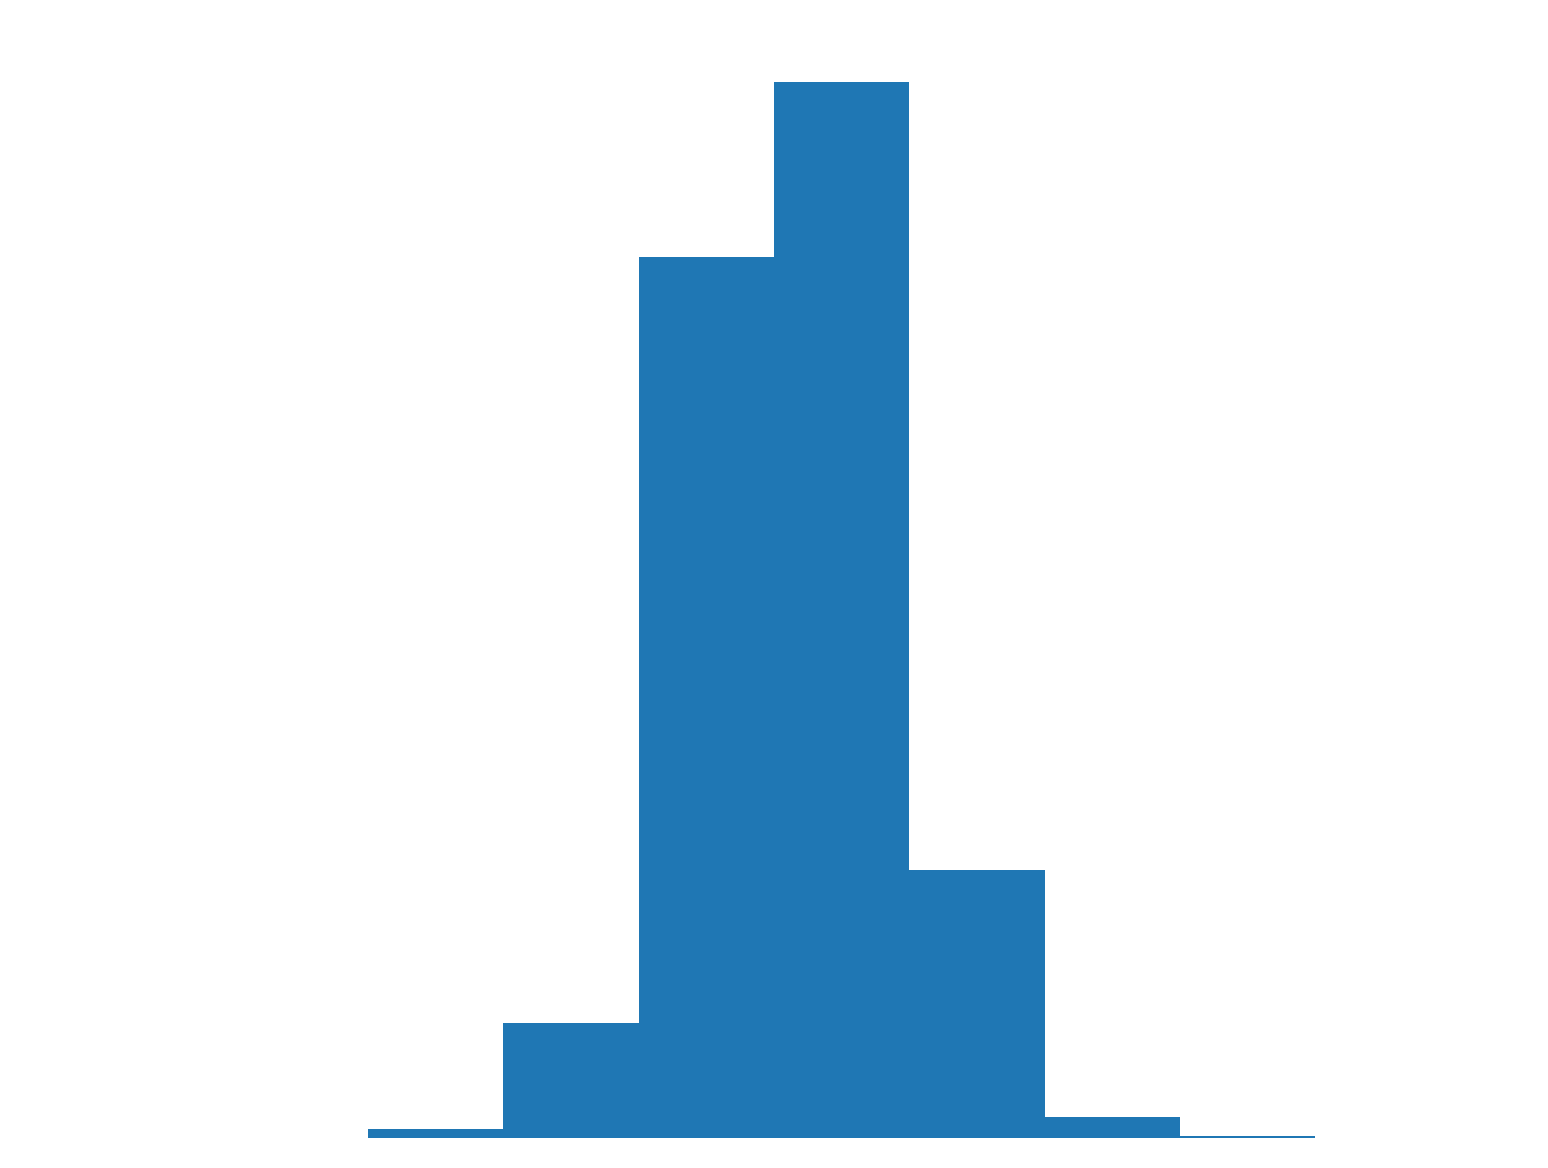

In [9]:
from tardis_em.utils.load_data import load_image
import matplotlib.pyplot as plt


img, px = load_image("../../../ht_example/10805/g3_MMM1_TS1_dose-filt.rec")
print(px)
plt.figure(dpi=300)
# plt.axis('off')
plt.hist(img.flatten())